## What does "Physical" Mean? 

Before we begin collecting data to use in this assignment, we should first find some general sense of direction. When I hear the word "Physical", I immediately think "Physics", which leads me to then think of __rocket science and space exploration__. Maybe that's because I took AP Mechanics at Phillips Academy and I am now disgusted by any mention of physics here on Earth, but that need not be discussed here. 

Therefore, we should find some dataset that deals with space in some capacity. My brief search on Kaggle lead me to a dataset featuring __sunspot activity__, which is "One of the greatest mysteries in Solar Physics", according to the dataset's curators. 

You can find the dataset here: https://www.kaggle.com/abhinand05/daily-sun-spot-data-1818-to-2019



## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Fetch data

In [2]:
sundata = pd.read_csv("sunspot_data.csv")
sundata

Unnamed: 0  Year  Month  Day  Date In Fraction Of Year  \
0               0  1818      1    1                  1818.001   
1               1  1818      1    2                  1818.004   
2               2  1818      1    3                  1818.007   
3               3  1818      1    4                  1818.010   
4               4  1818      1    5                  1818.012   
...           ...   ...    ...  ...                       ...   
73713       73713  2019     10   27                  2019.821   
73714       73714  2019     10   28                  2019.823   
73715       73715  2019     10   29                  2019.826   
73716       73716  2019     10   30                  2019.829   
73717       73717  2019     10   31                  2019.832   

       Number of Sunspots  Standard Deviation  Observations  Indicator  
0                      -1                -1.0             0          1  
1                      -1                -1.0             0          1  
2                      -1                -1.0             0          1  
3                      -1                -1.0             0          1  
4                      -1                -1.0             0          1  
...                   ...                 ...           ...        ...  
73713                   0                 0.0            34          0  
73714                   0                 0.0            34          0  
73715                   0                 0.0            30          0  
73716                   0                 0.0            24          0  
73717                   0                 0.0            28          0  

[73718 rows x 9 columns]

The columns deserve some explanation. To provide an explanation, I have borrowed the following descriptions from the dataset's page on Kaggle (https://www.kaggle.com/abhinand05/daily-sun-spot-data-1818-to-2019): 

* Year: Gregoarian calendar date

* Month: Gregorian calendar date

* Day: Gregorian calendar date

* Date In Fraction Of Year: Date In Fraction Of Year

* Number of Sunspots: Daily total sunspot number. A value of -1indicates that no number is available for that day (missing value)

* Standard Deviation: Daily standard deviation of the input sunspot numbers from individual stations

* Observations: Number of observations used to compute the daily value

* Indicator: Definitive/provisional indicator. A blank indicates that the value is definitive. A '*' symbol indicates that the value is still provisional and is subject to a possible revision (Usually the last 3 to 6 months)


## Fixing the Data

In [10]:
# let's remove any datums with -1 as the number of sunspots, and remove the "Unnamed: 0" column
sundata = sundata[sundata["Number of Sunspots"] != -1]
sundata.drop("Unnamed: 0", axis=1, inplace=True)
sundata

Year  Month  Day  Date In Fraction Of Year  Number of Sunspots  \
7      1818      1    8                  1818.021                  65   
12     1818      1   13                  1818.034                  37   
16     1818      1   17                  1818.045                  77   
17     1818      1   18                  1818.048                  98   
18     1818      1   19                  1818.051                 105   
...     ...    ...  ...                       ...                 ...   
73713  2019     10   27                  2019.821                   0   
73714  2019     10   28                  2019.823                   0   
73715  2019     10   29                  2019.826                   0   
73716  2019     10   30                  2019.829                   0   
73717  2019     10   31                  2019.832                   0   

       Standard Deviation  Observations  Indicator  
7                    10.2             1          1  
12                    7.7             1          1  
16                   11.1             1          1  
17                   12.6             1          1  
18                   13.0             1          1  
...                   ...           ...        ...  
73713                 0.0            34          0  
73714                 0.0            34          0  
73715                 0.0            30          0  
73716                 0.0            24          0  
73717                 0.0            28          0  

[70471 rows x 8 columns]

In [25]:
# to have a less-confusing dataset, let's only use 1 in every 10 rows:
sundata_small = sundata[::10]
sundata_small

Year  Month  Day  Date In Fraction Of Year  Number of Sunspots  \
7      1818      1    8                  1818.021                  65   
36     1818      2    6                  1818.100                  25   
56     1818      2   26                  1818.155                   0   
79     1818      3   21                  1818.218                  85   
98     1818      4    9                  1818.270                  60   
...     ...    ...  ...                       ...                 ...   
73677  2019      9   21                  2019.722                   0   
73687  2019     10    1                  2019.749                   7   
73697  2019     10   11                  2019.777                   0   
73707  2019     10   21                  2019.804                   0   
73717  2019     10   31                  2019.832                   0   

       Standard Deviation  Observations  Indicator  
7                    10.2             1          1  
36                    6.3             1          1  
56                    2.0             1          1  
79                   11.7             1          1  
98                    9.8             1          1  
...                   ...           ...        ...  
73677                 0.0            38          0  
73687                 0.5            21          0  
73697                 0.0            24          0  
73707                 0.0            20          0  
73717                 0.0            28          0  

[7048 rows x 8 columns]

## Visualizing the Data

This dataset is unique, in that it has several columns of purely numeric data. To visualize as much as we can of it, __we should use a 3-dimensional scatterplot__. Plus, 3-d plots never fail to look great! 

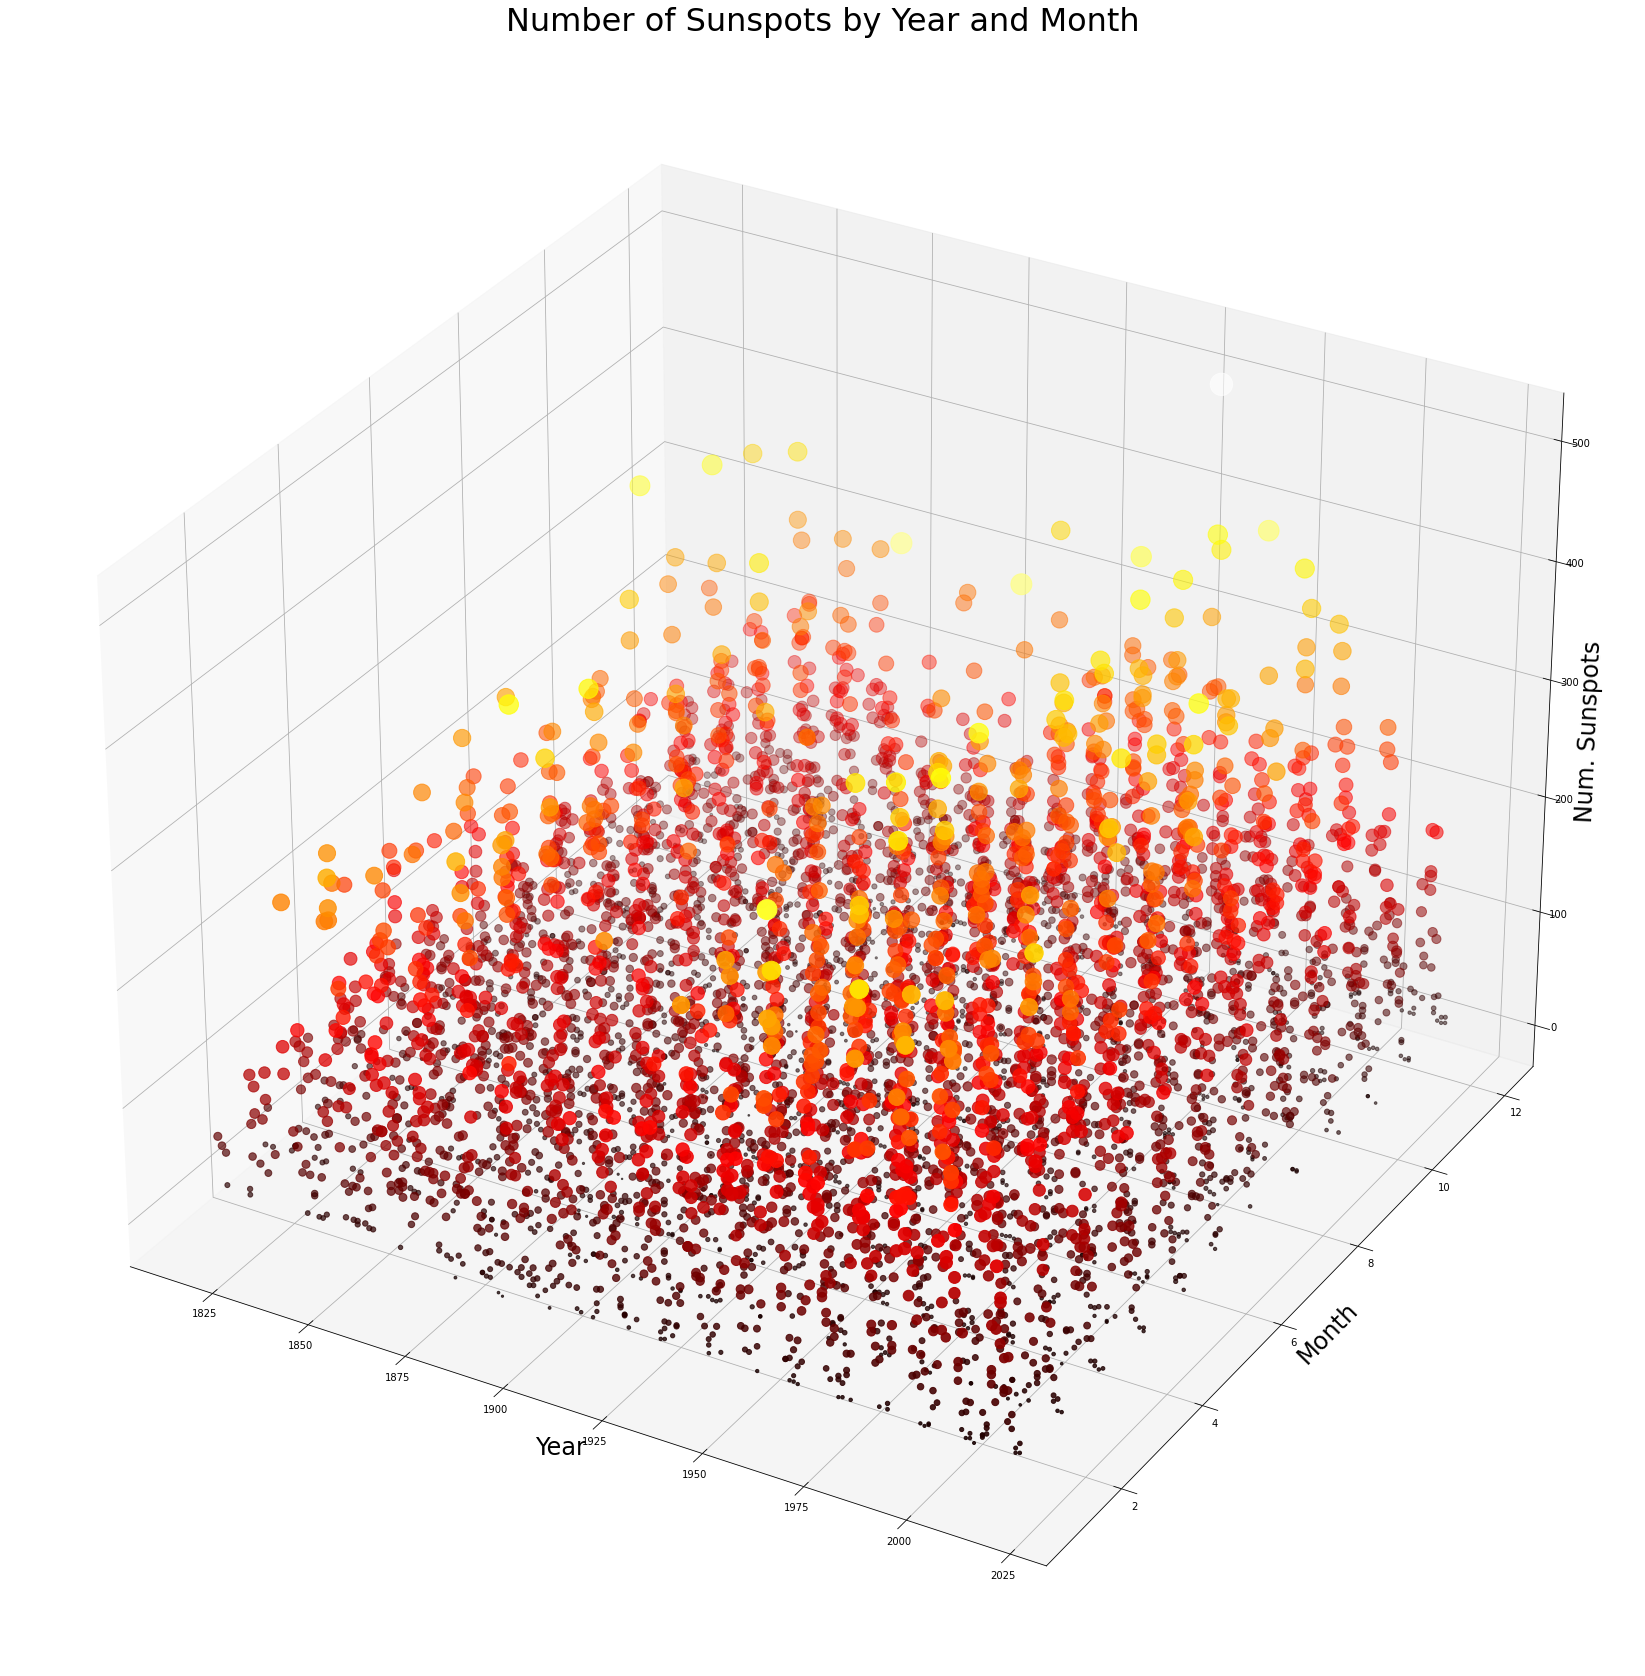

In [46]:
# we can first visualize year, month, and number of sunspots. 
plt.figure(figsize=(30,30))

ax = plt.axes(projection='3d')
ax.scatter(xs = sundata_small["Year"], 
           ys = sundata_small["Month"], 
           zs = sundata_small["Number of Sunspots"], 
           c = sundata_small["Number of Sunspots"], 
           s = sundata_small["Number of Sunspots"], # larger spot = more sunspots
           cmap='hot' 
           )

ax.set_xlabel("Year", fontsize=24)
ax.set_ylabel("Month", fontsize=24)
ax.set_zlabel("Num. Sunspots", fontsize=24)
ax.set_title("Number of Sunspots by Year and Month", fontsize=32)

plt.show()

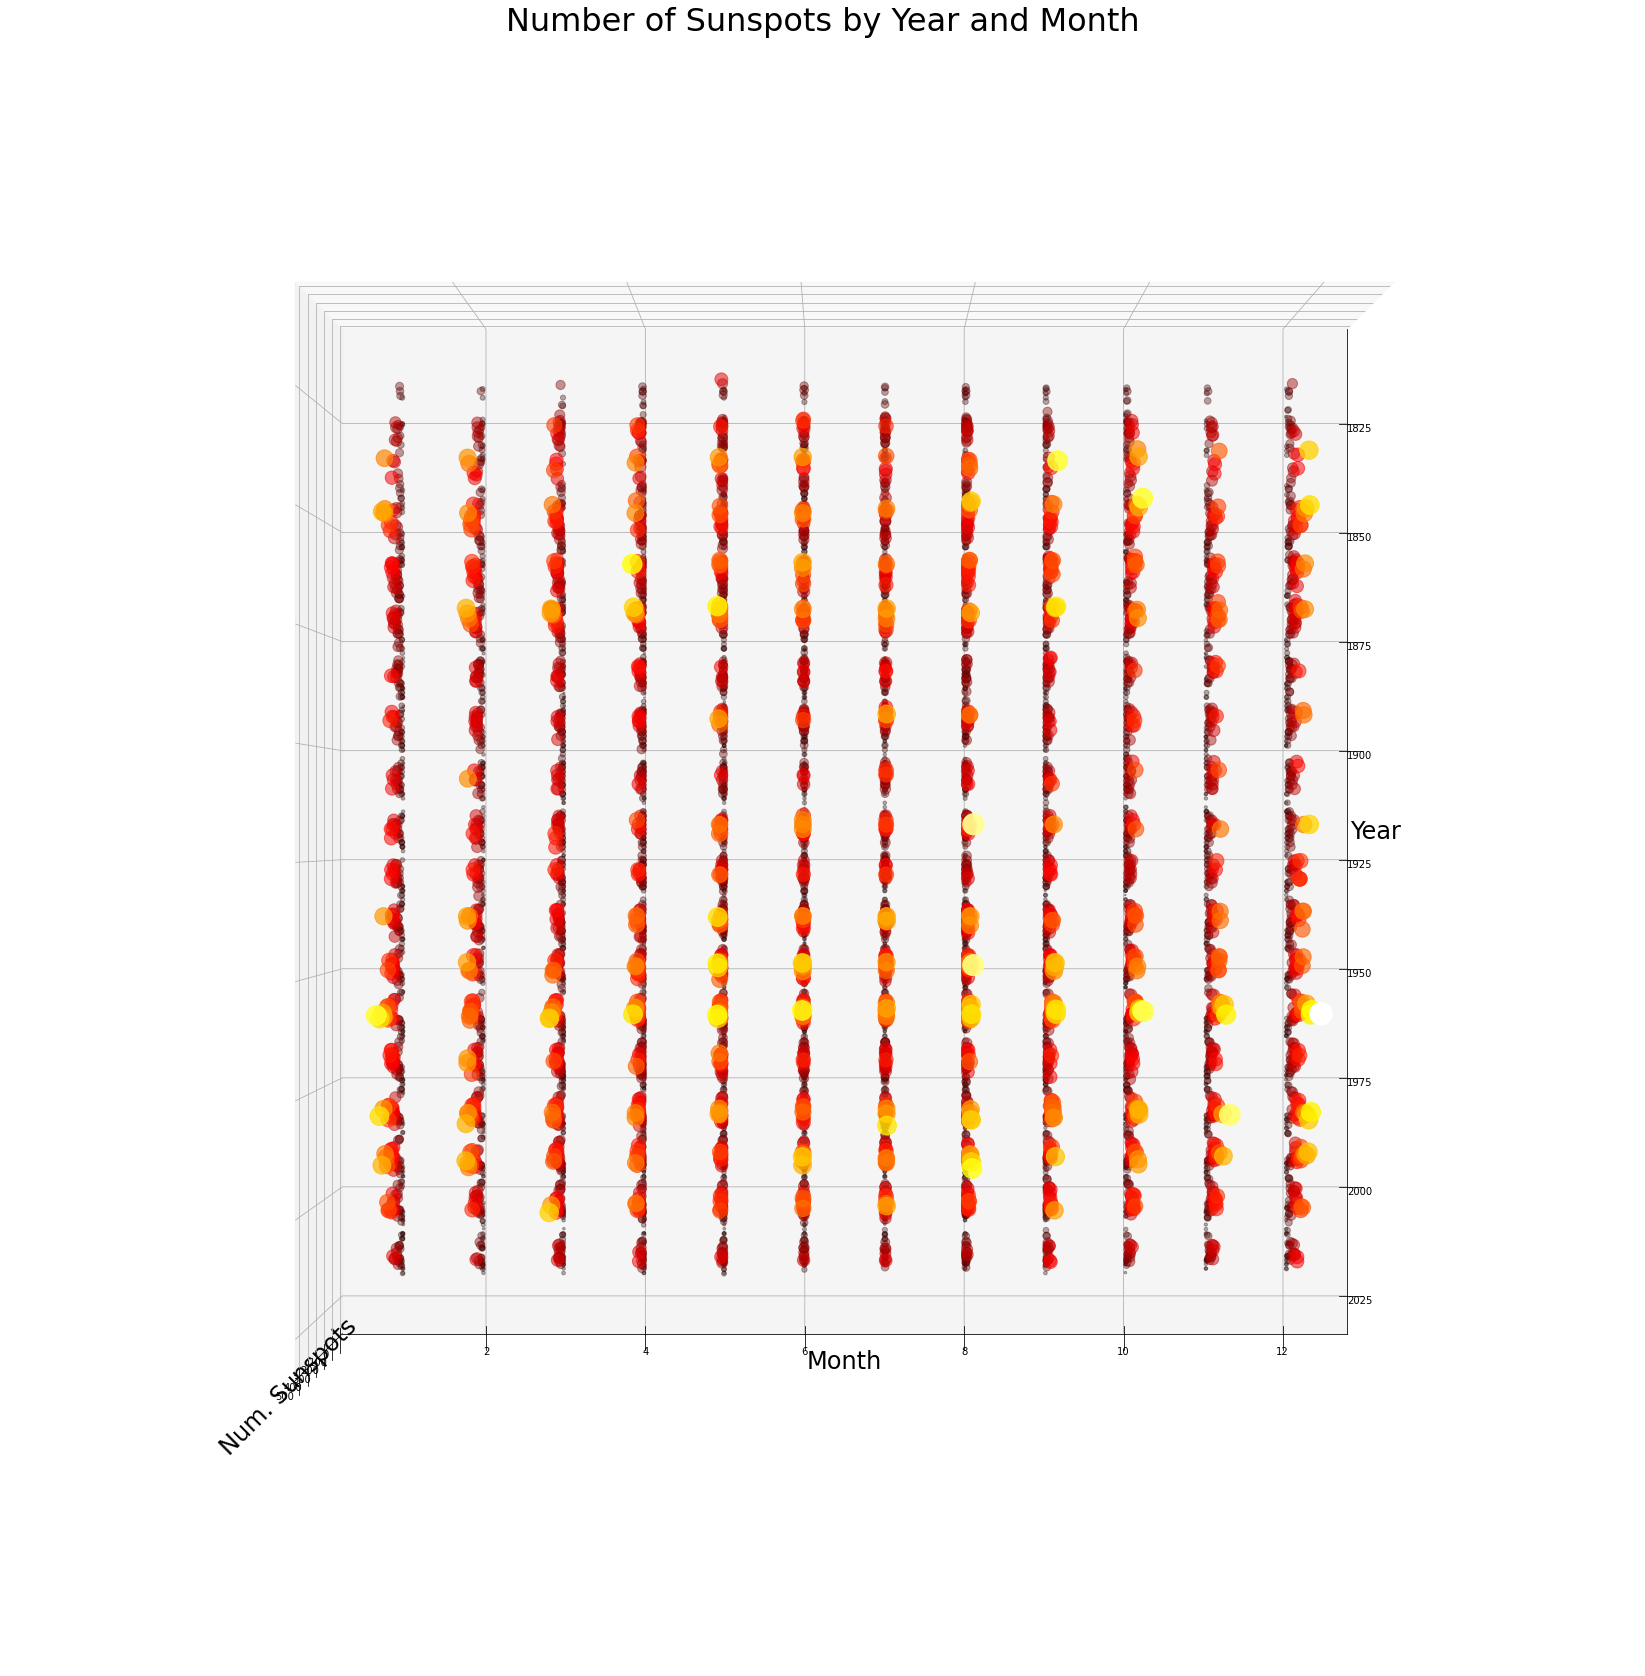

In [49]:
# interesting, there appears to be some sort of positive correlation between year and sunspot activity.
# we can change the perspective of the graph to top-down in order to see this better: 
plt.figure(figsize=(30,30))

ax = plt.axes(projection='3d')
ax.view_init(90, 0)
ax.scatter(xs = sundata_small["Year"], 
           ys = sundata_small["Month"], 
           zs = sundata_small["Number of Sunspots"], 
           c = sundata_small["Number of Sunspots"], 
           s = sundata_small["Number of Sunspots"], # larger spot = more sunspots
           cmap='hot' 
           )

ax.set_xlabel("Year", fontsize=24)
ax.set_ylabel("Month", fontsize=24)
ax.set_zlabel("Num. Sunspots", fontsize=24)
ax.set_title("Number of Sunspots by Year and Month", fontsize=32)

plt.show() # our suspicions were correct! 

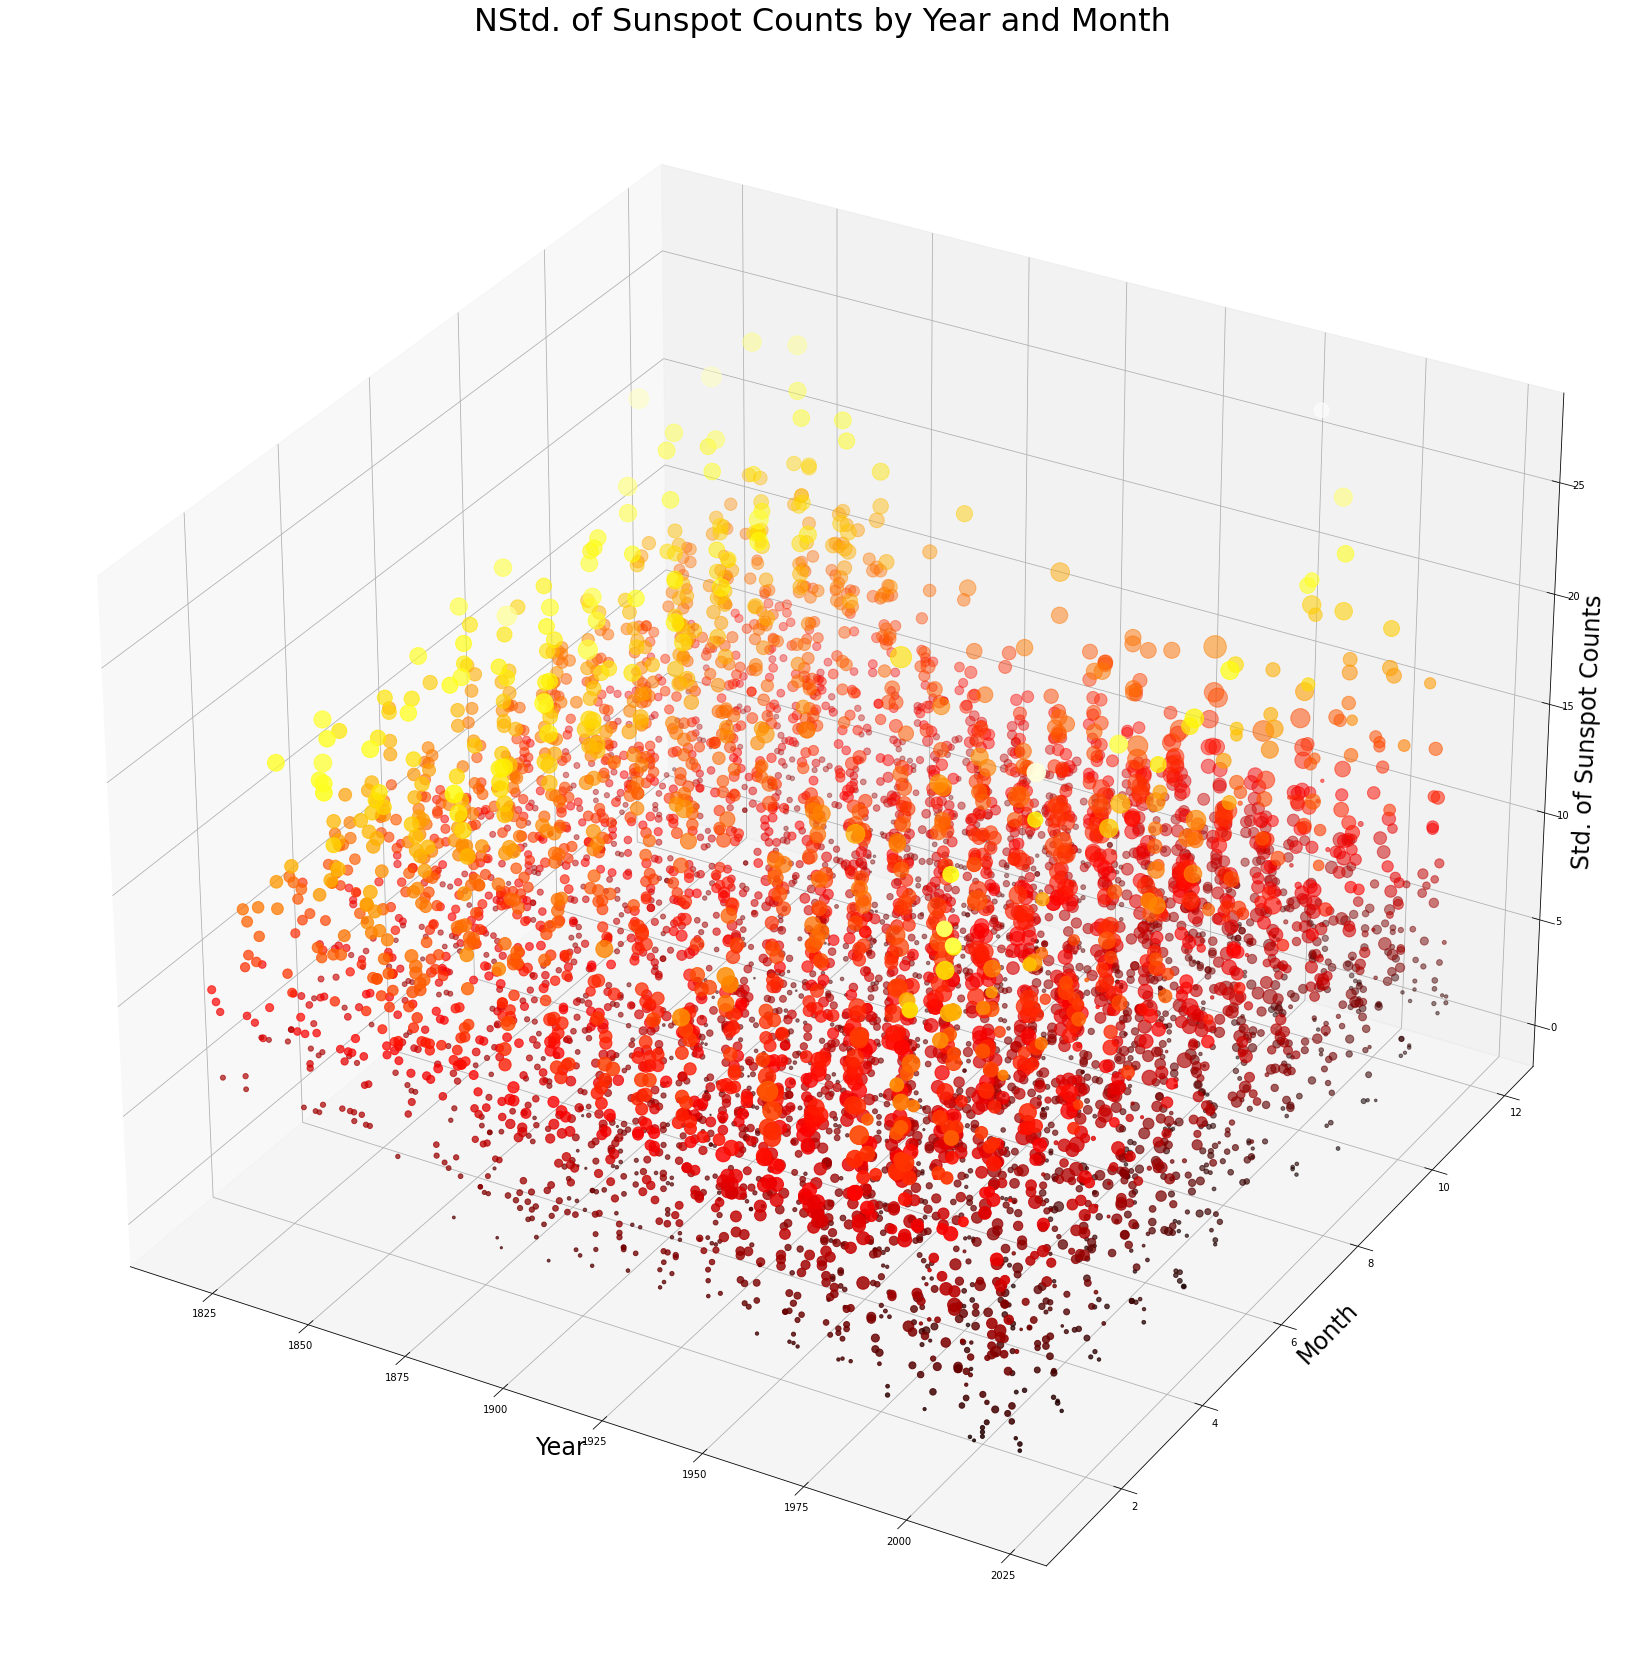

In [47]:
# Next, we can visualize year, month, and standard deviation.
# A reminder: Standard deviation in this case means, to the best of my knowledge, standard
# deviation from the mean number of sunspots detected across all sensors. 
plt.figure(figsize=(30,30))

ax = plt.axes(projection='3d')
ax.scatter(xs = sundata_small["Year"], 
           ys = sundata_small["Month"], 
           zs = sundata_small["Standard Deviation"], 
           c = sundata_small["Standard Deviation"], 
           s = sundata_small["Number of Sunspots"], # larger spot = more sunspots
           cmap='hot' 
           )

ax.set_xlabel("Year", fontsize=24)
ax.set_ylabel("Month", fontsize=24)
ax.set_zlabel("Std. of Sunspot Counts", fontsize=24)
ax.set_title("NStd. of Sunspot Counts by Year and Month", fontsize=32)

plt.show()

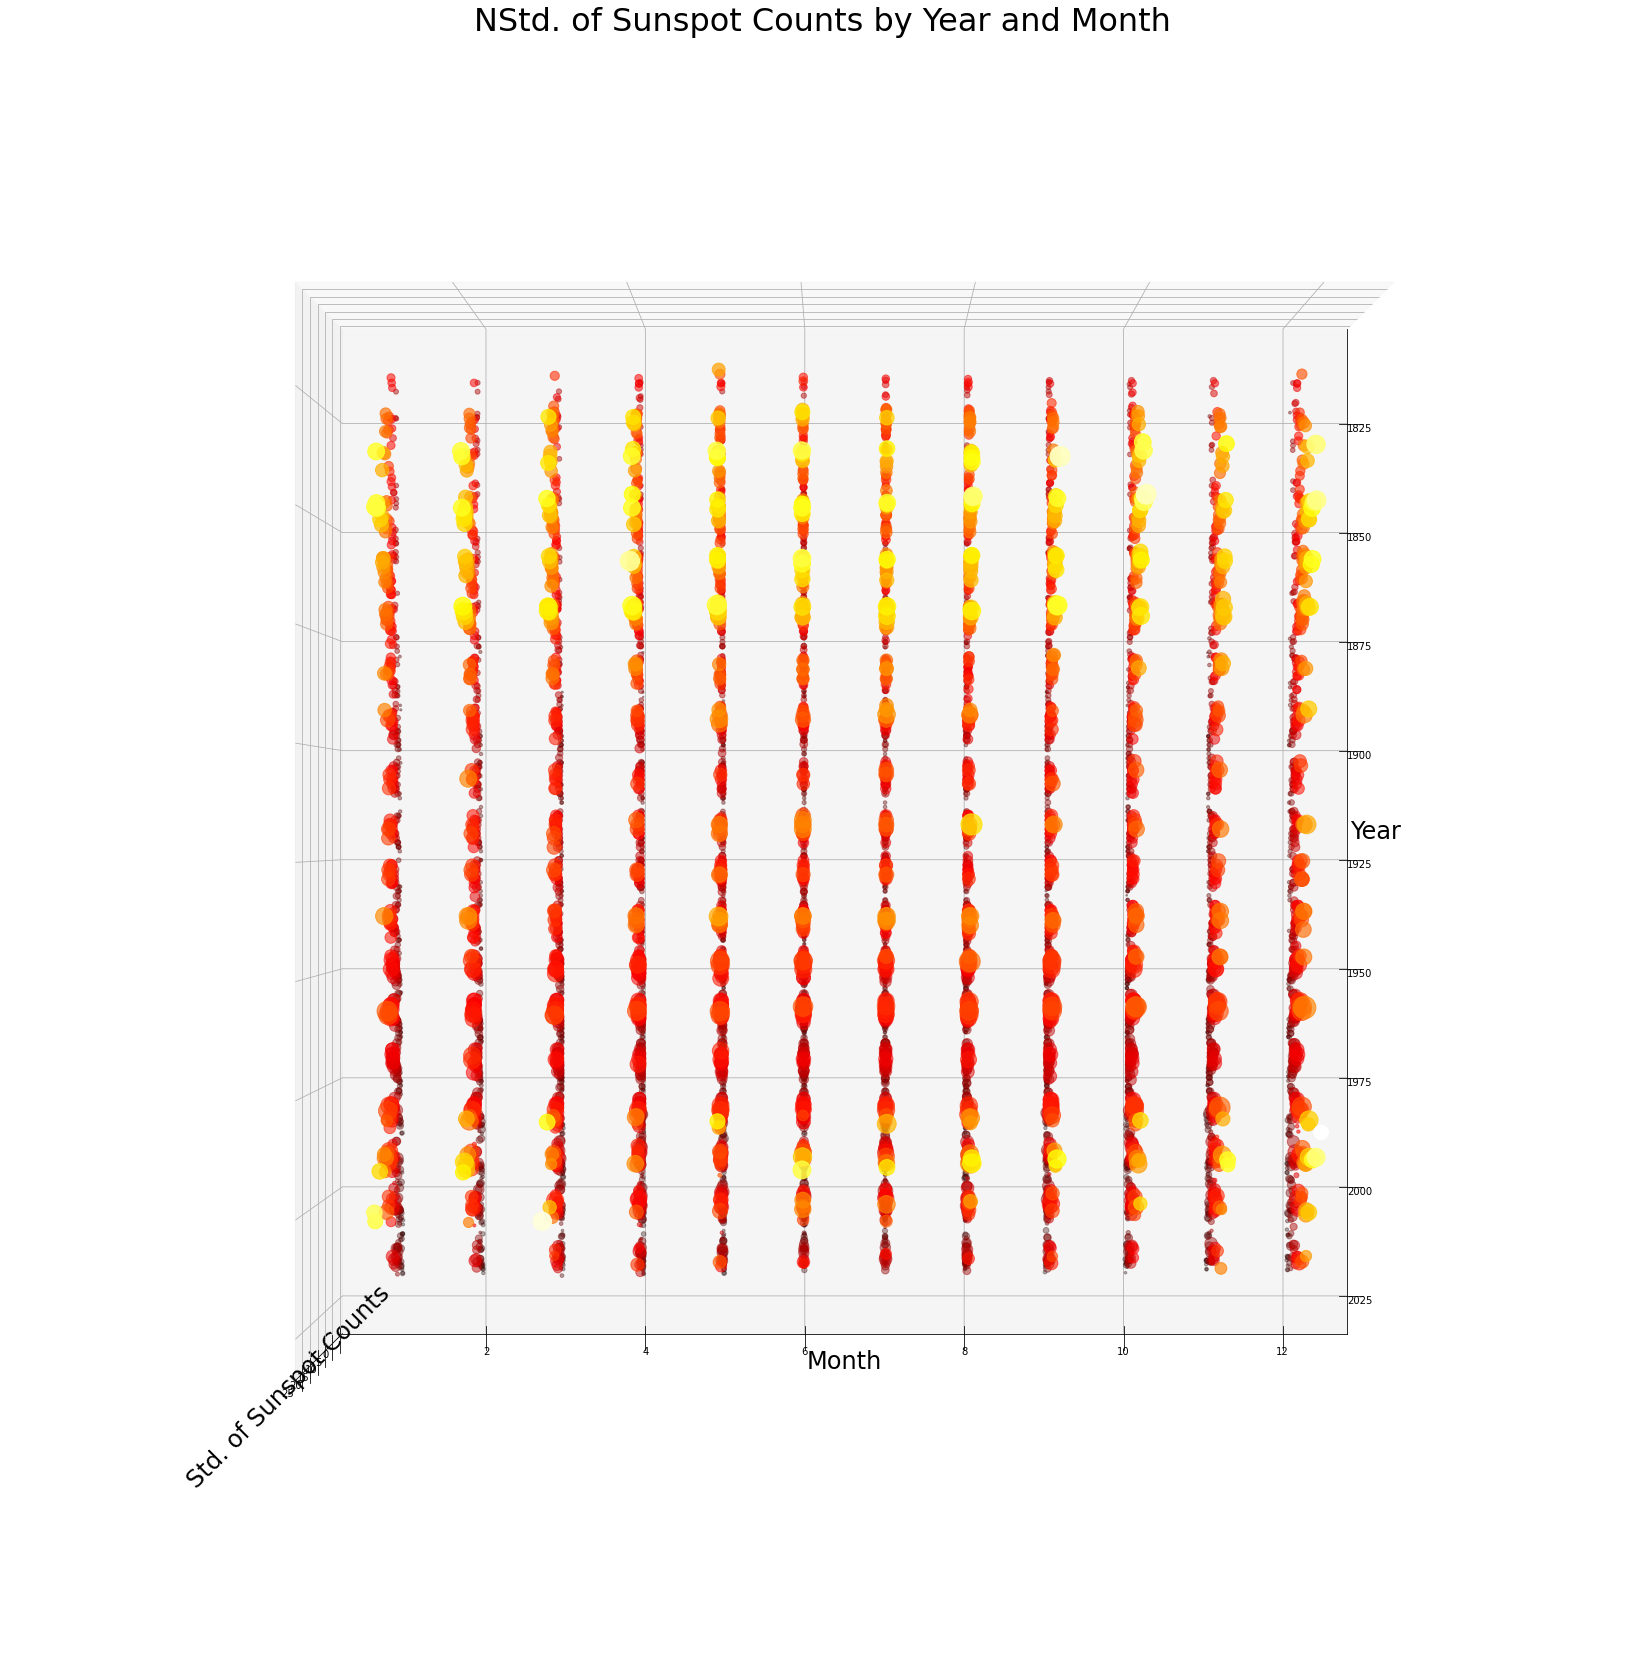

In [48]:
# there seems to be some positive correlation between standard deviation and year.
plt.figure(figsize=(30,30))

ax = plt.axes(projection='3d')
ax.view_init(90, 0)
ax.scatter(xs = sundata_small["Year"], 
           ys = sundata_small["Month"], 
           zs = sundata_small["Standard Deviation"], 
           c = sundata_small["Standard Deviation"], 
           s = sundata_small["Number of Sunspots"], # larger spot = more sunspots
           cmap='hot' 
           )

ax.set_xlabel("Year", fontsize=24)
ax.set_ylabel("Month", fontsize=24)
ax.set_zlabel("Std. of Sunspot Counts", fontsize=24)
ax.set_title("NStd. of Sunspot Counts by Year and Month", fontsize=32)

plt.show()


## Takeaways: What do we observe from the visualizations? 

* From the visualization of sunspot counts versus year and month, we may discern that some years had a greater frequency of sunspots (more sunspots = lighter color in the visualization). Why? I have no idea, but I would be very interested in finding out! 

* From the visualization of standard deviation of sunspot counts by year and month, we may conclude that earlier years (around 1825-75) had greater standard deviations in sunspot counts, as shown by yellow marks in the visualization. I hypothesize that this is a result of recording equipment being less sophisticated, leading to greater variation in recorded sunspot counts. 